<a href="https://colab.research.google.com/github/nishantkr2003/Plant-Disease-Detection/blob/main/Train_Plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Hello World!")

Hello World!


In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Importing Libraries

In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!git clone https://github.com/nishantkr2003/Plant-Disease-Detection.git

Cloning into 'Plant-Disease-Detection'...
remote: Enumerating objects: 87989, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 87989 (delta 2), reused 1 (delta 0), pack-reused 87983 (from 2)
Receiving objects: 100% (87989/87989), 1.39 GiB | 30.83 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Updating files: 100% (87905/87905), done.


In [5]:
!ls Plant-Disease-Detection


README.md  requirement.txt  test  train  Train_Plant_disease.ipynb  valid


# Data preProcessing

### Training Image Preprocessing

In [6]:

training_set = tf.keras.utils.image_dataset_from_directory(
    "/content/Plant-Disease-Detection/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)
print("Dataset successfully loaded!")

Found 70295 files belonging to 38 classes.
Dataset successfully loaded!


### Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "/content/Plant-Disease-Detection/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)


print("Validation dataset successfully loaded!")

Found 17572 files belonging to 38 classes.
Validation dataset successfully loaded!


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    # x is training set and y is label
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[164.25 120.25 109.25]
   [168.25 124.25 113.25]
   [167.   123.   112.  ]
   ...
   [158.25 119.25 114.25]
   [158.5  119.5  114.5 ]
   [161.   122.   117.  ]]

  [[169.75 125.75 114.75]
   [169.25 125.25 114.25]
   [166.   122.   111.  ]
   ...
   [160.   121.   116.  ]
   [160.   121.   116.  ]
   [162.25 123.25 118.25]]

  [[169.75 125.75 114.75]
   [169.25 125.25 114.25]
   [166.   122.   111.  ]
   ...
   [160.75 121.75 116.75]
   [159.5  120.5  115.5 ]
   [161.   122.   117.  ]]

  ...

  [[163.75 125.75 112.75]
   [163.25 125.25 112.25]
   [165.25 127.25 114.25]
   ...
   [160.   120.   110.  ]
   [153.25 113.25 103.25]
   [155.75 115.75 105.75]]

  [[161.75 123.75 110.75]
   [159.5  121.5  108.5 ]
   [168.5  130.5  117.5 ]
   ...
   [153.5  113.5  103.5 ]
   [164.5  124.5  114.5 ]
   [148.5  108.5   98.5 ]]

  [[169.5  131.5  118.5 ]
   [163.25 125.25 112.25]
   [160.75 122.75 109.75]
   ...
   [149.25 109.25  99.25]
   [154.   114.   104.  ]
   [157.25 117.25 10

### Building Model

In [10]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.models import Sequential


In [11]:
model = Sequential()

In [12]:
## Building convolution layer

In [13]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Dropout(0.25))  # To avoid Overfitting

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1500,activation='relu'))

In [21]:
model.add(Dropout(0.4))

In [22]:
#output layer

model.add(Dense(units=38,activation='softmax'))

In [23]:
#model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
#   learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

### Compiling Model

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [26]:
training_history = model.fit(x = training_set,validation_data = validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 160s 67ms/step - accuracy: 0.3559 - loss: 2.2833 - val_accuracy: 0.8391 - val_loss: 0.5214
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 181s 61ms/step - accuracy: 0.8271 - loss: 0.5476 - val_accuracy: 0.8939 - val_loss: 0.3287
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 0.9005 - loss: 0.3125 - val_accuracy: 0.9304 - val_loss: 0.2182
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 0.9332 - loss: 0.2055 - val_accuracy: 0.9225 - val_loss: 0.2368
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 61ms/step - accuracy: 0.9529 - loss: 0.1433 - val_accuracy: 0.9487 - val_loss: 0.1546
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 143s 62ms/step - accuracy: 0.9634 - loss: 0.1113 - val_accuracy: 0.9542 - val_loss: 0.1427
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 62ms/step - accuracy: 0.9720 - loss: 0.0858 - val_accuracy: 0.9601 - val_loss: 0.1344
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 144s 66ms/step - accuracy: 

### Model Evalution

In [27]:
# Model Evalution on traning set
train_loss, train_acc = model.evaluate(training_set)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 45s 20ms/step - accuracy: 0.9787 - loss: 0.0620


In [28]:
print('Training accuracy:', train_acc)
print('Training Loss:', train_loss)

Training accuracy: 0.9802119731903076
Training Loss: 0.057540323585271835


In [29]:
# Model on validation set
val_loss, val_acc = model.evaluate(validation_set)


550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9518 - loss: 0.1695


In [30]:
print('Validation accuracy:', val_acc)
print('Validation loss:', val_loss)

Validation accuracy: 0.9512292146682739
Validation loss: 0.16953153908252716


In [31]:
!cd Plant-Disease-Detection

In [32]:
!pwd


/content


### Saving Model

In [33]:
model.save('trained_model.keras')

In [34]:
model.save('trained_model.h5')

In [35]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5651753544807434,
  0.8513834476470947,
  0.9096237421035767,
  0.9368945360183716,
  0.9532114863395691,
  0.9641510844230652,
  0.9717618823051453,
  0.9760153889656067,
  0.9788178205490112,
  0.98268723487854],
 'loss': [1.4838286638259888,
  0.4692329466342926,
  0.27941378951072693,
  0.19331400096416473,
  0.13996349275112152,
  0.10964343696832657,
  0.08559242635965347,
  0.07382399588823318,
  0.06462373584508896,
  0.054822709411382675],
 'val_accuracy': [0.8391190767288208,
  0.8938652276992798,
  0.9304006099700928,
  0.9225472211837769,
  0.9487252235412598,
  0.954245388507843,
  0.960050106048584,
  0.9554973840713501,
  0.9554973840713501,
  0.9512292146682739],
 'val_loss': [0.5213591456413269,
  0.32870203256607056,
  0.2181965857744217,
  0.23679189383983612,
  0.15463575720787048,
  0.14271695911884308,
  0.13441699743270874,
  0.15151742100715637,
  0.14319004118442535,
  0.16953158378601074]}

In [36]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [37]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Accuracy Visulization

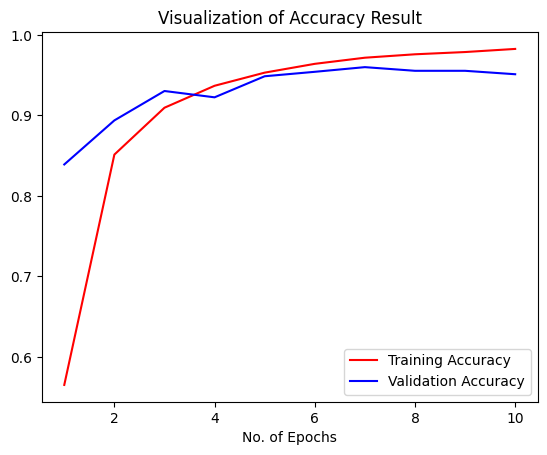

In [38]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Classification (othor model)

In [39]:
class_name = validation_set.class_names

In [40]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [43]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/Plant-Disease-Detection/valid', # Changed the path to include the full path
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

print("Validation dataset successfully loaded!")

Found 17572 files belonging to 38 classes.
Validation dataset successfully loaded!


# Predictions.

In [44]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step


In [45]:
y_pred

array([[9.9999988e-01, 2.2522403e-12, 3.8928753e-11, ..., 4.6528092e-16,
        3.7918416e-14, 4.4171847e-14],
       [9.9999988e-01, 1.2477836e-11, 1.6379922e-11, ..., 5.9319210e-18,
        6.3756646e-17, 3.4502185e-15],
       [9.9999976e-01, 1.1559616e-13, 4.5707856e-12, ..., 5.1837284e-19,
        1.4892671e-16, 3.8126965e-15],
       ...,
       [3.6023337e-11, 5.3026802e-12, 3.3713332e-09, ..., 3.7535851e-12,
        9.3912465e-12, 9.9998653e-01],
       [1.8227215e-07, 2.3297912e-09, 3.3370776e-07, ..., 3.0519163e-09,
        8.4904501e-09, 9.9979407e-01],
       [5.2060428e-13, 2.5299644e-13, 1.4973326e-11, ..., 7.1837762e-15,
        2.6071520e-11, 9.9999678e-01]], dtype=float32)

In [54]:
y_pred.shape

(17572, 38)

In [55]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)  #return index of max probablity

In [56]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [48]:
Y_true.shape

TensorShape([17572])

In [57]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [58]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

### Classification Report

In [59]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [60]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.94      0.96       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.95      0.96      0.96       440
                                   Apple___healthy       0.99      0.91      0.95       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.95      1.00      0.97       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.79      0.98      0.87       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.83      0.

In [61]:
# Precision =(TP/(TP+FP))
# Recall =(TP/(TP+FN))
# Accuracy =((TP+TN)/(TP+TN+FP+FN))
# f1-score = Harmonic mean of Precision and Recall

In [62]:
# pred = model.predict(testds)
# pred = [np.argmax(i) for i in pred]
# y_test = testds.classes
# print(classification_report(pred,y_test))

### Confusion Matrix

In [63]:
cm = confusion_matrix(Y_true,predicted_categories)

In [64]:
cm

array([[474,   2,   2, ...,   1,   0,   0],
       [  2, 482,   1, ...,   0,   0,   0],
       [  0,   0, 421, ...,   2,   0,   0],
       ...,
       [  0,   0,   0, ..., 488,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   0, ...,   0,   1, 463]])

In [65]:
cm.shape

(38, 38)

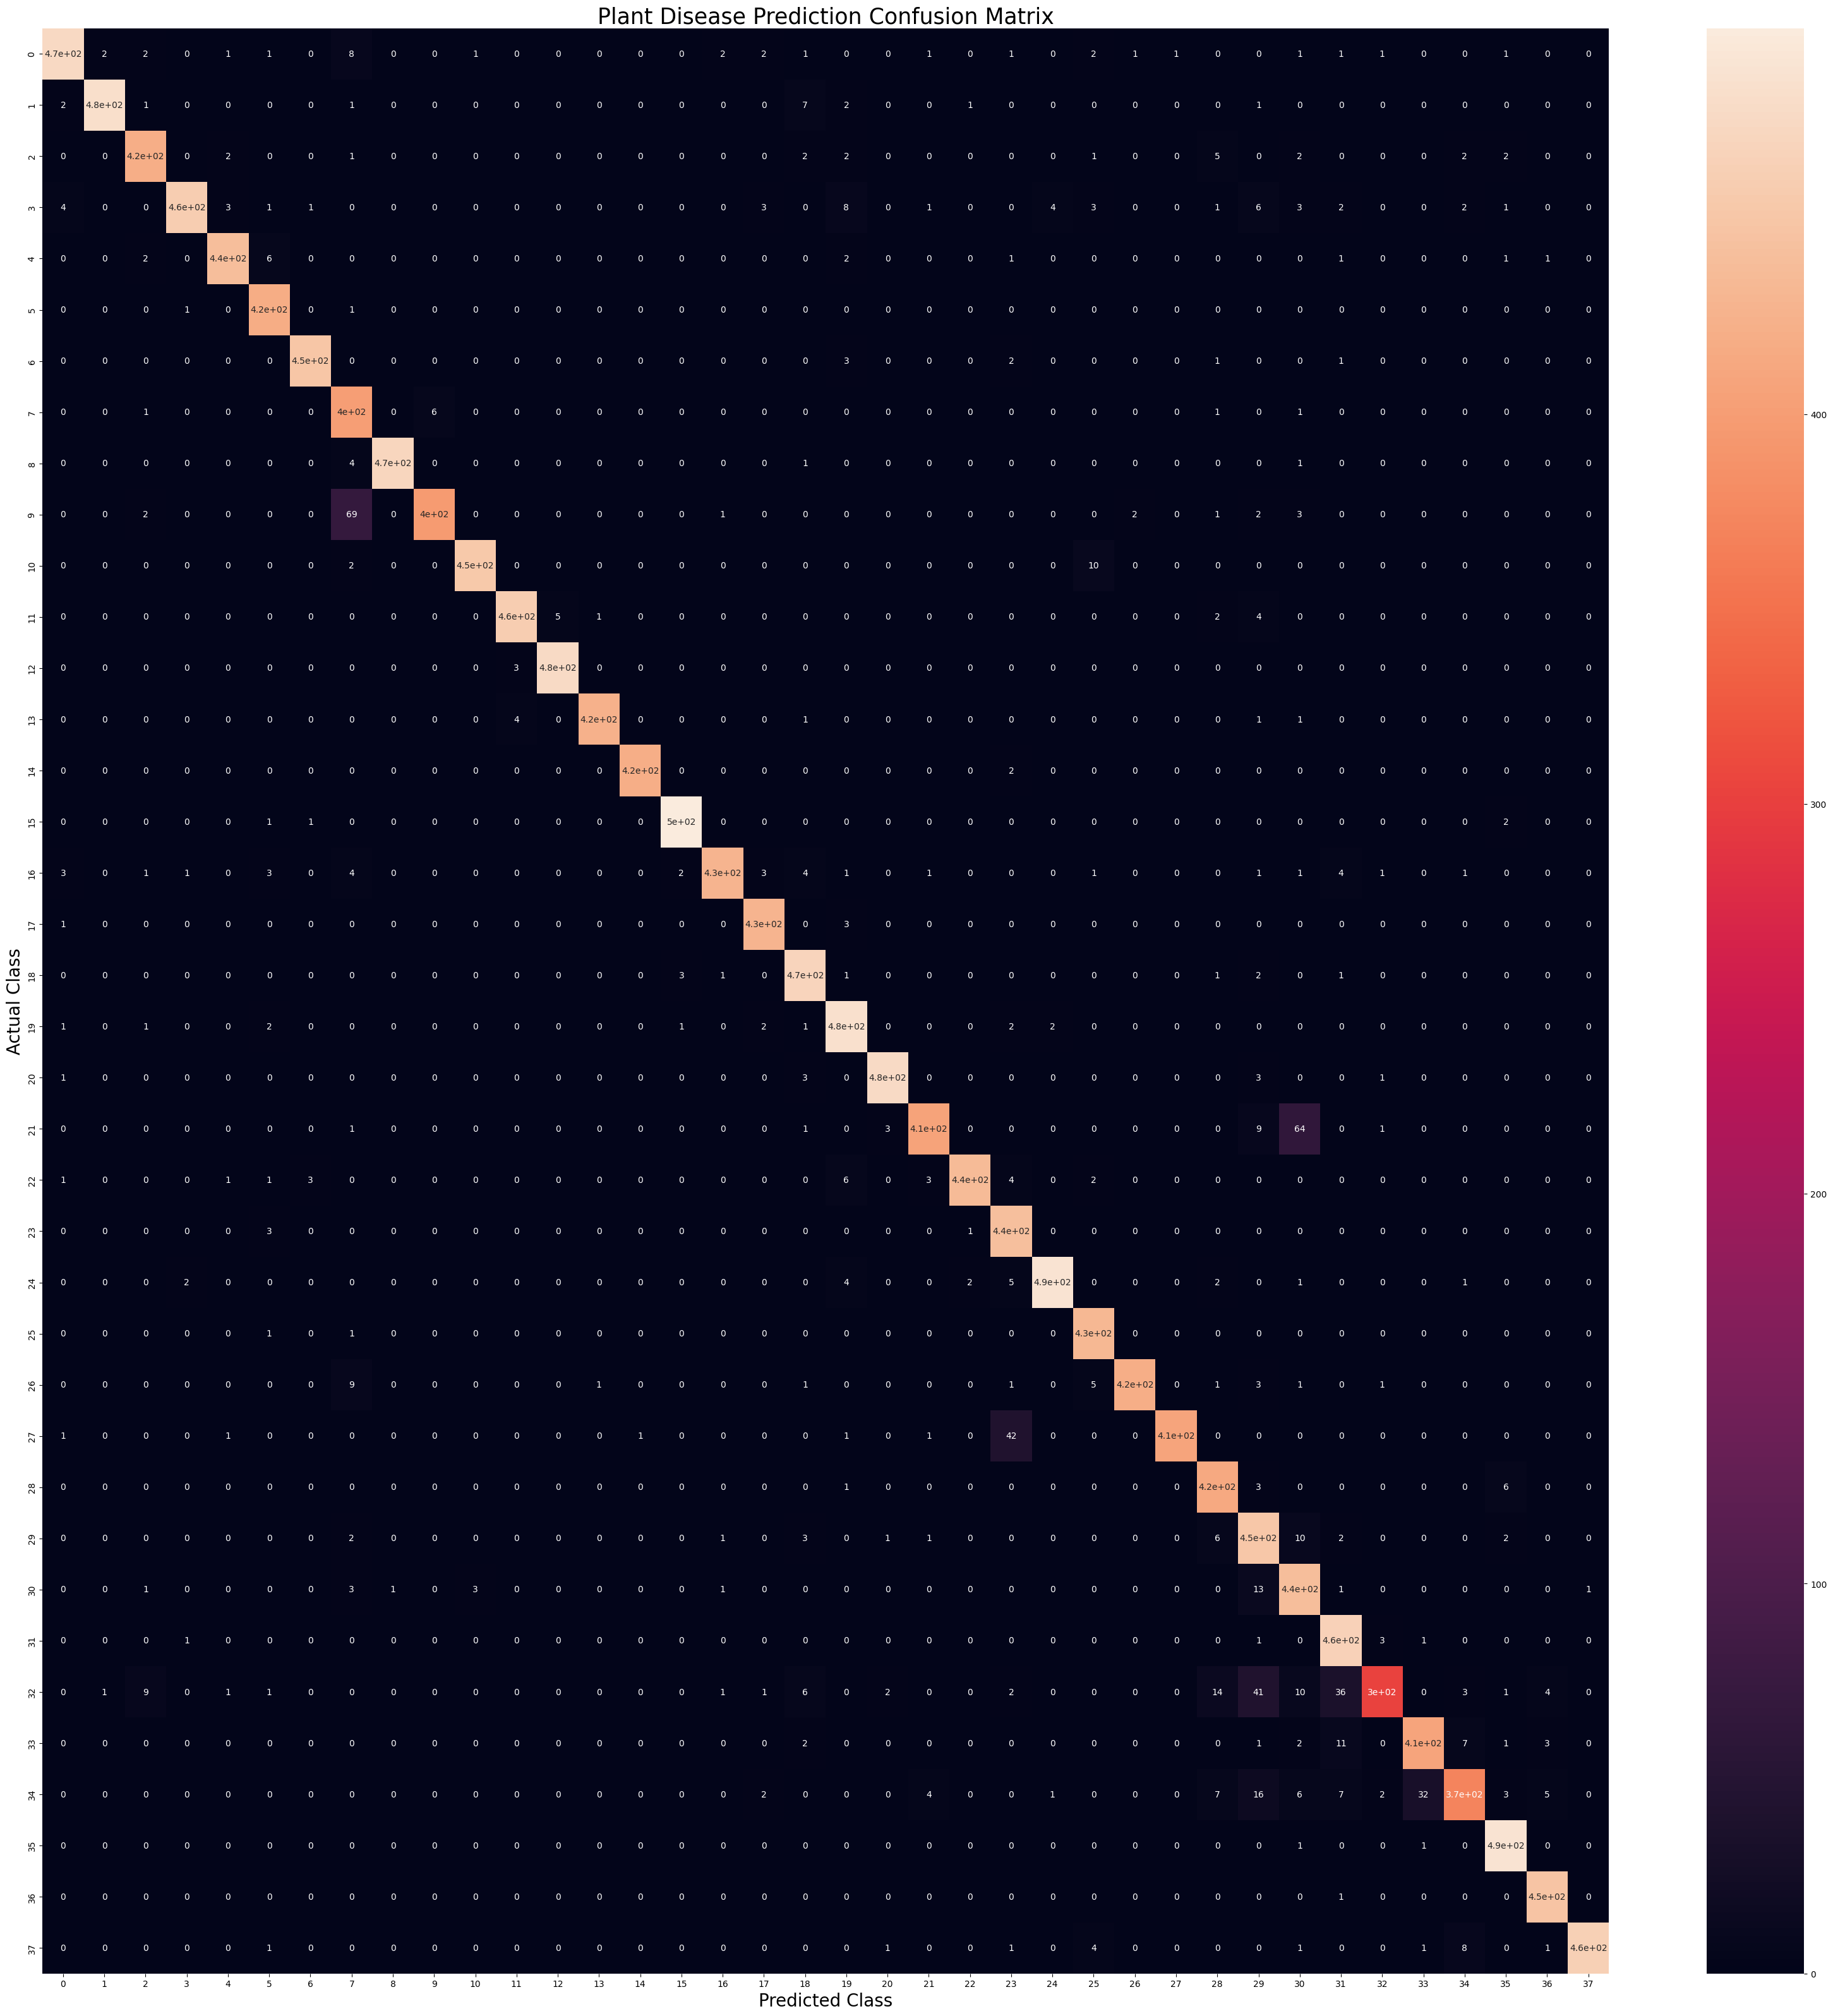

In [66]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()